In [149]:
#문제1
import collections
import pandas as pd
import numpy as np
pieces=[]
for year in range(1880,2011):
    path="C:/Users/student/Downloads/names/names/yob%d.txt" %year
#     print(path)
    df=pd.read_csv(path,names=['name','sex','births'])
    df['year']=year
    pieces.append(df)
# pieces
# pd.concat(pieces).shape
names=pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [150]:
# total_births=pd.pivot_table(data=names,values='births',index='year',columns='sex'
#                            ,aggfunc=sum)

In [151]:
def add_prop(gruop):
    #구현
    gruop['prop']=gruop.births/gruop.births.sum()
    return gruop
names=names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [152]:
def get_top1000(group):
    return group.sort_index(by='births',ascending=False)[:1000]

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(get_top1000)
#그룹 인덱스 제거
top1000.reset_index(inplace=True, drop=True)
top1000

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [153]:
total_births=top1000.pivot_table(values="births",index='year',
                    columns='name',aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [155]:
total_births=top1000.pivot_table(values='births',index='year',
                                 columns='name',aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [157]:
subset=total_births[['John','Harry','Mary','Marilyn']]
subset.plot()
subset.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017082F0CE48>,
      dtype=object)

In [158]:
table=top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

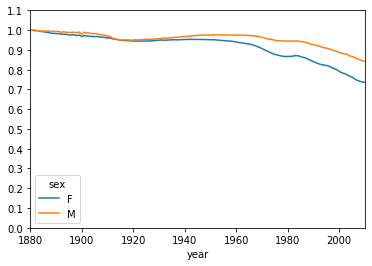

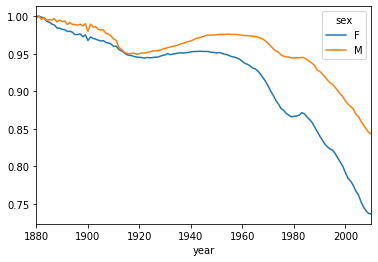

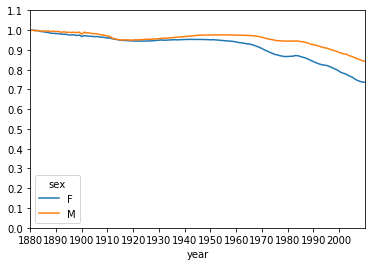

In [159]:
table.plot(yticks=np.linspace(0,1.1,12))
table.plot()
table.plot(yticks=np.linspace(0,1.1,12),xticks=range(1880,2010,10))

In [160]:
girls=top1000[top1000.sex=='F']
boys=top1000[top1000.sex=='M']

In [161]:
df=boys[boys.year==2010]

In [162]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [163]:
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum[:10]
prop_cumsum.values.searchsorted(0.5)#116번째 자리, 50퍼 이하 117개
#117번째 아이의 이름에서 0.5가 됨

116

In [164]:
df=boys[boys.year==1900]
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum()
in1900
in1900.values.searchsorted(0.5)+1

25

In [165]:
top1000
def get_qc(group,q=0.5):
    group=group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q)+1
diversity=top1000.groupby(['year','sex']).apply(get_qc)
print(diversity)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  This is separate from the ipykernel package so we can avoid doing imports until


year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64


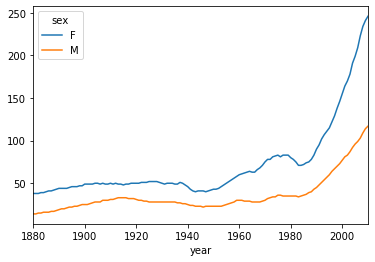

In [166]:
diversity=diversity.unstack('sex')
diversity.plot()

In [167]:
#이름에 사용된 철자의 변화 패턴?
#상위 50% 이름들에 사용된 철자

In [168]:
# #name열에서 마지막 글자를 추출
# for i in range(0,len(names.name)):
#     print(names.name[i][-1])
#print(names.name.map(lambda x:x[-1]))
# get_ln=lambda x:x[-1]
# names.name.map(get_ln)

In [169]:
get_ln=lambda x:x[-1]
last_letters=names.name.map(get_ln)
last_letters.name='last_letter'
last_letters
table=names.pivot_table('births',index=last_letters,
                        columns=['sex','year'],aggfunc=sum)

In [170]:
table#1900, 1950, 2010년만 F M 각각
subtable=table.reindex(columns=[1900,1950,2010],level='year')

In [171]:
subtable.sum(axis=0)
letter_prop=subtable/subtable.sum(axis=0)
letter_prop

sex                 F                             M                    
year             1900      1950      2010      1900      1950      2010
last_letter                                                            
a            0.299907  0.336533  0.381240  0.005779  0.002255  0.014980
b                 NaN  0.000010  0.000256  0.002471  0.000912  0.020470
c                 NaN  0.000009  0.000538  0.001986  0.003631  0.012181
d            0.012239  0.002576  0.001482  0.102946  0.147292  0.023387
e            0.357084  0.220002  0.178415  0.150982  0.094226  0.067959
f                 NaN       NaN  0.000055  0.000770  0.000475  0.001188
g            0.000110  0.000064  0.000374  0.001680  0.004155  0.001404
h            0.051032  0.045475  0.075852  0.041407  0.037949  0.051670
i            0.001201  0.010573  0.031734  0.001030  0.000347  0.022628
j                 NaN       NaN  0.000090       NaN  0.000003  0.000769
k            0.000100  0.000118  0.000356  0.040344  0.031163  0.018541
l            0.048867  0.037996  0.026356  0.061885  0.096122  0.070367
m            0.001024  0.000939  0.002588  0.071768  0.038463  0.024657
n            0.060922  0.147093  0.140210  0.137645  0.140693  0.362771
o            0.001160  0.004231  0.001243  0.011757  0.010765  0.042681
p                 NaN  0.000021  0.000020  0.002869  0.006364  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.012088  0.004903  0.018025  0.068334  0.034107  0.087477
s            0.031523  0.022787  0.013332  0.133235  0.134987  0.065145
t            0.023226  0.022290  0.007830  0.068182  0.068701  0.022861
u            0.001167  0.000536  0.000417  0.000179  0.000043  0.001221
v                 NaN       NaN  0.000117  0.000126  0.000016  0.001434
w            0.000020  0.000025  0.001182  0.006303  0.003926  0.016148
x                 NaN  0.000032  0.000727  0.003507  0.001783  0.008614
y            0.096294  0.143438  0.116828  0.084661  0.141470  0.058168
z            0.002034  0.000351  0.000704  0.000153  0.000150  0.001831

In [172]:
import matplotlib.pyplot as plt

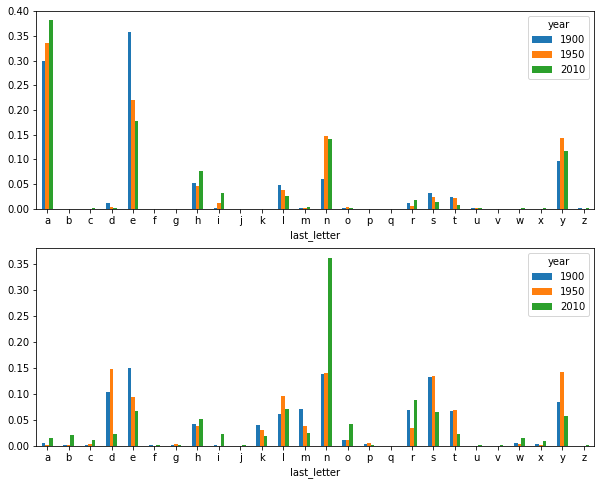

In [173]:
fig,axes=plt.subplots(2,1,figsize=(10,8))
letter_prop['F'].plot(kind='bar',rot=0, ax=axes[0])
letter_prop['M'].plot(kind='bar',rot=0, ax=axes[1])

In [174]:
letter_prop['F'].plot(kind='bar',rot=0, ax=axes[0])
letter_prop['M'].plot(kind='bar',rot=0, ax=axes[1])

In [181]:
#https://www.data.go.kr/ 에서 데이터 받아 사용!
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [183]:
#1. 연습문제 1900년 남자아이, 여자아이 전체 수 출력 
names.groupby('sex')['births'].sum()
names[names.year==1900].groupby('sex')['births'].sum()

sex
F    299873
M    150554
Name: births, dtype: int64

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\student\Anaconda3\lib\site-packages\pandas\core\indexing.py:993: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  obj = getattr(obj, self.name)._getitem_axis(key, axis=axis)


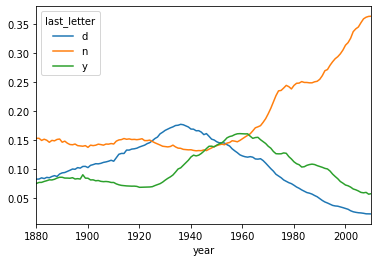

In [177]:
#d,n,y
letter_prop=table/table.sum()
letter_prop['M']
letter_prop.loc['a']
dny_ts=letter_prop.ix[['d','n','y'],'M']
dny_ts=dny_ts.T
dny_ts.plot()


In [178]:
import warnings
warnings.filterwarnings(action='ignore')
unames=['user_id','gender','age','occupation','zip']
rnames=['user_id','movie_id','ratings','timestamp']
mnames=['movie_id','title','genres']

upath="C:/Users/student/Downloads/dataset/movielens/users.dat"
rpath="C:/Users/student/Downloads/dataset/movielens/ratings.dat"
mpath="C:/Users/student/Downloads/dataset/movielens/movies.dat"

users=pd.read_csv(upath,sep="::",
                  header=None, names=unames)
ratings=pd.read_csv(rpath,sep="::",
                  header=None, names=rnames)
movies=pd.read_csv(mpath,sep="::",
                  header=None, names=mnames)
users
ratings
# movies
data=pd.merge(pd.merge(ratings,users),movies)
# movies
data
mean_ratings=data.pivot_table(values='ratings',index='title',columns='gender')
mean_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [179]:
ratings_by_title=data.groupby('title').size()
type(ratings_by_title)
# ratings_by_title.index
# ratings_by_title.values
active_titles=ratings_by_title[ratings_by_title>=250].index
ratings_by_title[ratings_by_title>=250].values
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [109]:
data

,user_id,movie_id,ratings,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [126]:
"""
mean_ratings 에서 active_titles에 저장된 
영화제목에 대한 데이터만 추출
"""
mean_ratings.iloc[0]
# active_titles
mean_ratings.loc['$1,000,000 Duck (1971)']
mean_ratings=mean_ratings.loc[active_titles]

In [132]:
top_female_ratings=mean_ratings.sort_index(by='F',ascending=False)
# mean_ratings.sort_values(by='F',ascending=False)
top_female_ratings

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [153]:
mean_ratings
#남녀간 평점차를 구했을때 가장 평점차가 큰
#영화제목이 무엇인지 확인
mean_ratings['diff']=(mean_ratings['F']-mean_ratings['M'])
mean_ratings['diff(abs)']=abs(mean_ratings['F']-mean_ratings['M'])
sorted_by_diff=mean_ratings.sort_index(by='diff', ascending=True)
mean_ratings
sorted_by_diff

gender,F,M,diff,diff(abs)
title,,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,-0.726351,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,-0.676359,0.676359
Dumb & Dumber (1994),2.697987,3.336595,-0.638608,0.638608
"Longest Day, The (1962)",3.411765,4.031447,-0.619682,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787,0.613787
...,...,...,...,...
Steel Magnolias (1989),3.901734,3.365957,0.535777,0.535777
Little Women (1994),3.870588,3.321739,0.548849,0.548849
Grease (1978),3.975265,3.367041,0.608224,0.608224


In [154]:
sorted_by_diff[::-1]

gender,F,M,diff,diff(abs)
title,,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782,0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359,0.676359
Grease (1978),3.975265,3.367041,0.608224,0.608224
Little Women (1994),3.870588,3.321739,0.548849,0.548849
Steel Magnolias (1989),3.901734,3.365957,0.535777,0.535777
...,...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,-0.613787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,-0.619682,0.619682
Dumb & Dumber (1994),2.697987,3.336595,-0.638608,0.638608


In [162]:
#평점의 표준편차
rs_by_title=data.groupby('title')['ratings'].std()
rs_by_title=rs_by_title.loc[active_titles]
rs_by_title
#표준편차를 내림차순으로 정렬
rs_by_title.sort_values(ascending=False)
#표준편차 크면 호불호 강함


title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
                                           ...   
Wrong Trousers, The (1993)               0.708666
Shawshank Redemption, The (1994)         0.700443
Great Escape, The (1963)                 0.692585
Rear Window (1954)                       0.688946
Close Shave, A (1995)                    0.667143
Name: ratings, Length: 1216, dtype: float64

In [190]:
#문제2
names[names.name=='Lesley']

,name,sex,births,year,prop
5865,Lesley,M,6,1882,0.000053
8093,Lesley,M,5,1883,0.000048
32564,Lesley,F,5,1893,0.000023
42857,Lesley,M,5,1896,0.000042
45887,Lesley,M,5,1897,0.000044
...,...,...,...,...,...
1621500,Lesley,M,5,2008,0.000002
1623479,Lesley,F,222,2009,0.000121
1650509,Lesley,M,10,2009,0.000005
1658064,Lesley,F,219,2010,0.000125


In [188]:
#문제3
import pandas as pd
data=pd.read_csv("C:/Users/student/Downloads/Python_JP/서울특별시_동대문구_등록동물이름현황_20191203.csv",
                encoding='CP949')
data

,등록이름,등록건수,데이터기준일자
0,코코,238,2019-12-03
1,보리,190,2019-12-03
2,초코,175,2019-12-03
3,콩이,158,2019-12-03
4,해피,139,2019-12-03
...,...,...,...
4166,흰털,1,2019-12-03
4167,히마,1,2019-12-03
4168,힌둥,1,2019-12-03
4169,힐링,1,2019-12-03


In [139]:
#문제4 로또 업그레이드(보너스번호 추가)
import random
random.random()

lotto_list=list(range(1,46))
lotto_list_User=list(range(1,46))
pop_num=0 #pop 시켜줄때마다 증가시키는 변수
lotto_list_num=0 #pop시켜주기 위한 요소 위치 나타내는 변수
i=0
bonus=0
listA=[]
listU=[]

while i!= 7:
    lotto_list_num=lotto_list[random.randint(0,len(lotto_list)-pop_num)]
    if i==6:#뽀나스 번호!! 
        bonus=lotto_list.pop(lotto_list_num)
        pop_num=0
    else:
        listA.append(lotto_list.pop(lotto_list_num))
#     print(lotto_list.pop(lotto_list_num),end=" ")# 로또번호 출력 겹침x
    pop_num+=1
    i+=1
print("로또 번호:",listA, ", 보너스 번호 :",bonus)#정답 로또번호출력

i=0
while i!= 6:
    lotto_list_num=lotto_list_User[random.randint(0,len(lotto_list_User)-pop_num)]
    listU.append(lotto_list_User.pop(lotto_list_num))
#     print(lotto_list.pop(lotto_list_num),end=" ")# 로또번호 출력 겹침x
    pop_num+=1
    i+=1
    
print("유저 번호:",listU)
#유저번호와 로또 번호 비교
count=0 #총 몇개 맞는지 비교 변수
for i in range(0,6):
    if listU[i] in listA:
        count+=1
if count==6:
    print("1등 당첨")
elif count==5:
    if bonus in listU:
        print("2등 당첨")
    else:
        print("3등 당첨")
elif count==4:
    print("4등 당첨")
else:
#     print(count,"개 맞음")
    print("꽝 or 껌값 ㅅㄱ")
# print(lotto_list)#테스트용 남은 로또번호 출력
# print(lotto_list_User)

로또 번호: [27, 43, 22, 4, 13, 34] , 보너스 번호 : 10
유저 번호: [41, 25, 11, 31, 38, 16]
꽝 or 껌값 ㅅㄱ


In [147]:
random.sample(listU,1)

[38]